### Student Information
Name:周駿傑

Student ID:114164518

GitHub ID:143371193+Ha1ion@users.noreply.github.com

URL : https://github.com/Ha1ion/DM2025-Lab1-Exercise

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

## 步驟流程說明:
   * 步驟 1: 載入與清理資料
   * 步驟 2: 探索性資料分析 (EDA)
   * 步驟 3: 建立文件-詞彙矩陣
   * 步驟 4: 詞頻視覺化 (長尾分佈)
   * 步驟 5: 降維與互動式視覺化
  準備資料 (步驟1) → 宏觀觀察 (步驟2) → 數據量化 (步驟3) → 深入分析    
  (步驟4 & 5)

## 步驟 0: 環境設定與函式庫載入

In [162]:
### Begin Assignment Here
import pandas as pd
import numpy as np
import math
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import plotly.express as px

try:
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
    plt.rcParams['axes.unicode_minus'] = False
except Exception as e:
    print(f"警告：中文字體設定失敗，圖表標題可能無法正常顯示。錯誤：{e}")
try:
    STOPWORDS = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    STOPWORDS = set(stopwords.words('english'))

print("環境與函式庫準備完成。")
print("-" * 50)

環境與函式庫準備完成。
--------------------------------------------------


## 步驟 1: 載入、清理與準備新資料集

In [166]:
print("步驟 1: 載入與清理資料...")

# 載入資料集
try:
    df = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')
    print("成功載入 'Reddit-stock-sentiment.csv'")
except FileNotFoundError:
    print("錯誤：找不到 'newdataset/Reddit-stock-sentiment.csv'，請確認檔案路徑。")
    # 如果找不到檔案，則停止執行
    exit()

# 選取必要欄位並重新命名
df = df[['text', 'label']].copy()
df.rename(columns={'Text': 'text', 'Label': 'label'}, inplace=True)

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# 新增一個可讀的類別名稱欄位
label_map = {1: '正面', 0: '中性', -1: '負面'}
df['category_name'] = df['label'].map(label_map)

def clean_text(text):
    text = re.sub(r'http\S+', '', text)  
    text = re.sub(r'[^a-zA-Z\s]', '', text) 
    text = text.lower() # 轉為小寫
    return text

df['cleaned_text'] = df['text'].apply(clean_text)

print(f"資料清理完成，剩餘資料筆數: {len(df)}")
print("資料集預覽：")
print(df.head())
print("-" * 50)


步驟 1: 載入與清理資料...
成功載入 'Reddit-stock-sentiment.csv'
資料清理完成，剩餘資料筆數: 824
資料集預覽：
                                                text  label category_name  \
0                                   Calls on retards   -1.0            負面   
1  Stunt as in like why did they even make a big ...    0.0            中性   
2                  Seeing lots of red in the ticker.    0.0            中性   
3  Vision Marine Technologies Inc. is rewriting t...    1.0            正面   
4                           He didn’t say thank you.   -1.0            負面   

                                        cleaned_text  
0                                   calls on retards  
1  stunt as in like why did they even make a big ...  
2                   seeing lots of red in the ticker  
3  vision marine technologies inc is rewriting th...  
4                             he didnt say thank you  
--------------------------------------------------


## 步驟 1.1: 資料取樣 (Data Sampling)

In [ ]:
print("步驟 1.1: 進行資料取樣...")

# 設定取樣率，例如 50%
sampling_rate = 0.5
df_sampled = df.sample(frac=sampling_rate, random_state=42)

print(f"原始資料筆數: {len(df)}")
print(f"取樣後資料筆數 ({sampling_rate*100}%): {len(df_sampled)}")
print("資料取樣完成。後續步驟將使用取樣後的資料集。")
print("-" * 50)

# 為了讓後續的程式碼不用修改，我們直接用取樣後的資料覆蓋原來的 DataFrame
df = df_sampled.copy()

## 步驟 1.2: 特徵建立 (為頻繁模式探勘建立交易資料庫)

In [ ]:
from helpers.text_analysis import clean_text_for_fpm

print("步驟 1.2: 建立交易資料庫...")

# 對取樣後的資料集的 'cleaned_text' 欄位進行處理
# clean_text_for_fpm 函數會進行分詞、移除停用詞等操作
transactions = df['cleaned_text'].apply(clean_text_for_fpm)

# 將結果儲存為交易資料庫檔案，每行一個交易，項目以逗號分隔
output_filename = 'td_freq_db_soc_religion_christian.csv'
with open(output_filename, 'w', encoding='utf-8') as f:
    for transaction in transactions:
        if transaction: # 確保交易不是空的
            f.write(','.join(transaction) + '\n')

print(f"交易資料庫建立完成，並儲存於 '{output_filename}'")
print("交易資料庫預覽 (前5筆):")
for i, t in enumerate(transactions.head()):
    print(f"  交易 {i+1}: {t}")
print("-" * 50)

## 步驟 2: 探索性資料分析 (EDA) - (新的視覺化圖表)

步驟 2: 進行探索性資料分析...


C:\Users\user\AppData\Local\Temp\ipykernel_84\1665907323.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




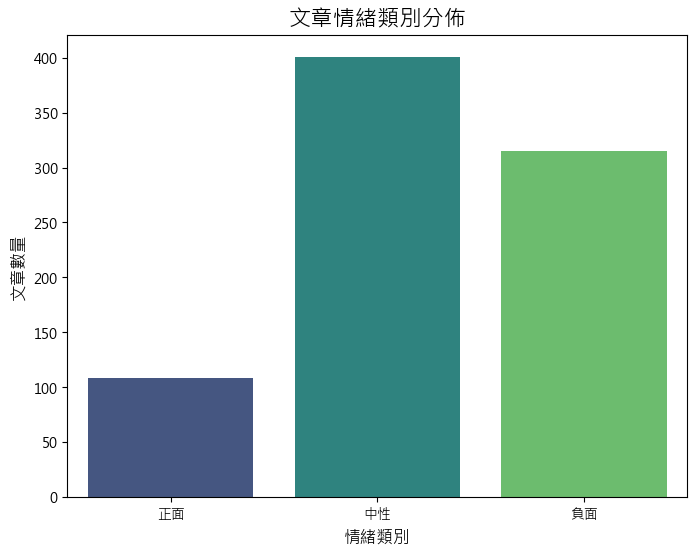

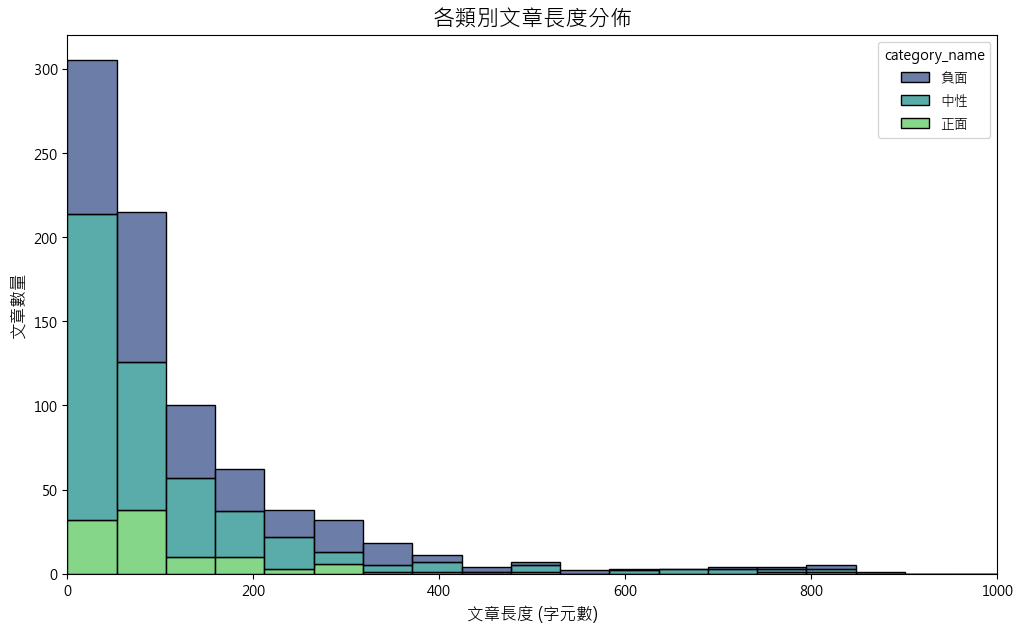

--------------------------------------------------


In [167]:
print("步驟 2: 進行探索性資料分析...")

# 視覺化圖表 1: 各類別文章數量分佈
plt.figure(figsize=(8, 6))
sns.countplot(x='category_name', data=df, order=['正面', '中性', '負面'], palette='viridis')
plt.title('文章情緒類別分佈', fontsize=16)
plt.xlabel('情緒類別', fontsize=12)
plt.ylabel('文章數量', fontsize=12)
plt.show()

# 視覺化圖表 2: 各類別文章長度分佈
df['text_length'] = df['cleaned_text'].str.len()
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='text_length', hue='category_name', multiple='stack', bins=50, palette='viridis')
plt.title('各類別文章長度分佈', fontsize=16)
plt.xlabel('文章長度 (字元數)', fontsize=12)
plt.ylabel('文章數量', fontsize=12)
plt.xlim(0, 1000) 
plt.show()
print("-" * 50)

練習 1-8已被包含在上述流程

練習 1 (印出前三筆紀錄):

練習 2 & 3 (Pandas 查詢技巧):

練習 4 & 5 (處理缺失值):

練習 6, 7, 8 (資料抽樣與比較):

練習 9 (使用 analyzer 分析單筆紀錄):

## 步驟 3: 建立文件-詞彙矩陣 (對應練習 9-13)

In [168]:
print("步驟 3: 建立文件-詞彙矩陣...")

# 使用 CountVectorizer 進行特徵工程
# 練習13的z方法:過濾掉極端頻率的詞彙
vectorizer = CountVectorizer(
    stop_words=list(STOPWORDS),
    min_df=10,        # 一個詞至少要在 10 份文件中出現
    max_df=0.7,      # 一個詞最多只能在 70% 的文件中出現
    ngram_range=(1, 1) # 只考慮單一詞彙
)

X_counts = vectorizer.fit_transform(df['cleaned_text'])
terms = vectorizer.get_feature_names_out()

print(f"過濾後的詞彙庫大小: {len(terms)} 個詞彙")
print(f"文件-詞彙矩陣維度: {X_counts.shape}")
print("-" * 50)

步驟 3: 建立文件-詞彙矩陣...
過濾後的詞彙庫大小: 176 個詞彙
文件-詞彙矩陣維度: (824, 176)
--------------------------------------------------


## 步驟 4: 詞頻視覺化 (對應練習 14-15)

步驟 4: 進行詞頻視覺化...


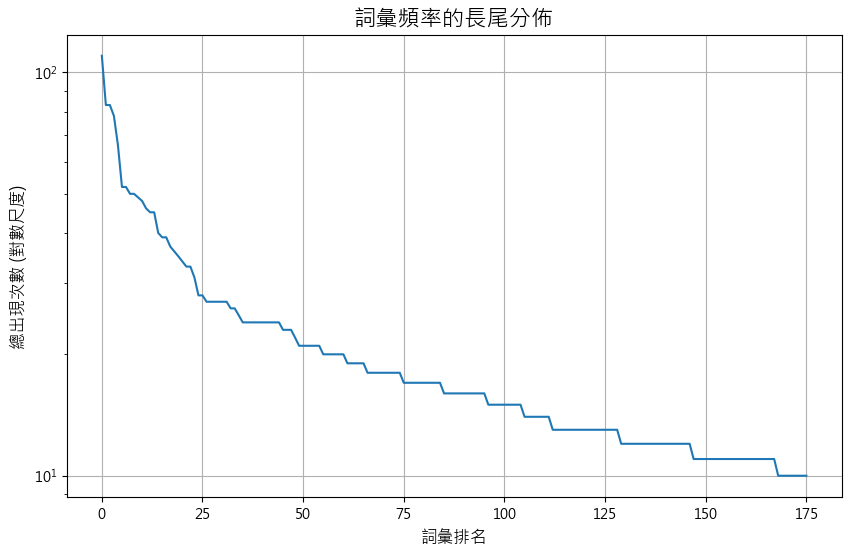

In [169]:
print("步驟 4: 進行詞頻視覺化...")

term_frequencies = np.asarray(X_counts.sum(axis=0)).flatten()
freq_df = pd.DataFrame({'term': terms, 'frequency': term_frequencies})
sorted_freq_df = freq_df.sort_values(by='frequency', ascending=False)

# 視覺化  (練習 14): 長尾分佈曲線
plt.figure(figsize=(10, 6))
plt.plot(range(len(sorted_freq_df)), sorted_freq_df['frequency'])
plt.yscale('log')
plt.title('詞彙頻率的長尾分佈', fontsize=16)
plt.xlabel('詞彙排名', fontsize=12)
plt.ylabel('總出現次數 (對數尺度)', fontsize=12)
plt.grid(True)
plt.show()

## 步驟 5: 降維與互動式視覺化 (對應練習11-12)

步驟 5: 使用 UMAP 降維與 Plotly 互動式視覺化...


C:\nthu\2025_DM_Lab1\DM2025-Lab1-Exercise\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



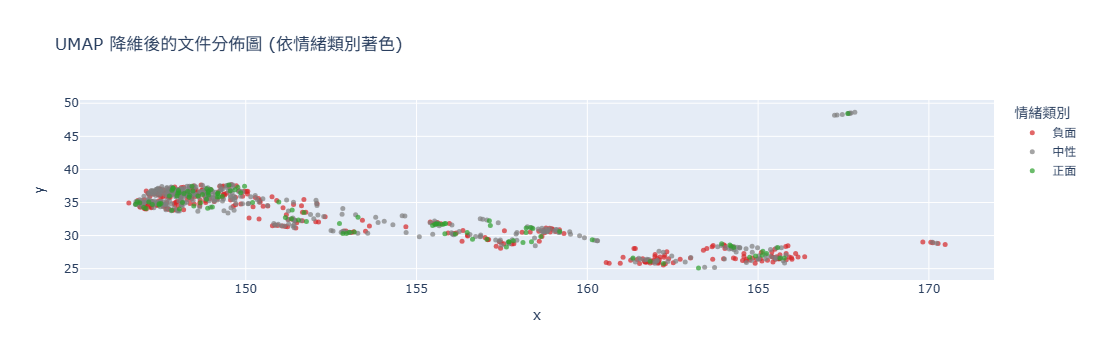

--------------------------------------------------


In [170]:
print("步驟 5: 使用 UMAP 降維與 Plotly 互動式視覺化...")
reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=20,
min_dist=0.2)
embedding = reducer.fit_transform(X_counts)

plot_df = pd.DataFrame(embedding, columns=['x', 'y'])
df.reset_index(drop=True, inplace=True)
plot_df = pd.concat([plot_df, df[['category_name', 'text']]], axis=1)
plot_df['text_preview'] = plot_df['text'].str[:100] + '...'

fig = px.scatter(
      plot_df,
      x='x',
      y='y',
      color='category_name',
      hover_data={'text_preview': True, 'x': False, 'y': False},
      title='UMAP 降維後的文件分佈圖 (依情緒類別著色)',
      color_discrete_map={'正面': '#2ca02c', '中性': '#7f7f7f', '負面':
  '#d62728'}
  )
fig.update_traces(marker=dict(size=5, opacity=0.7))
fig.update_layout(legend_title_text='情緒類別')
fig.show()
print("-" * 50)

### 額外的新視覺化：常見詞組 (Bigram) 分析
圖表解讀：
執行後產生的這張圖表，可以讓您非常清楚地看到在這些 Reddit貼文中，哪些「片語」或「術語」被大家最頻繁地提及。
這對於理解社群的流行語、討論焦點以及情緒表達方式，提供了比單一詞彙更豐富的洞見。

額外視覺化：分析最常見的連續詞組 (Bigrams)...


C:\Users\user\AppData\Local\Temp\ipykernel_84\269366564.py:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




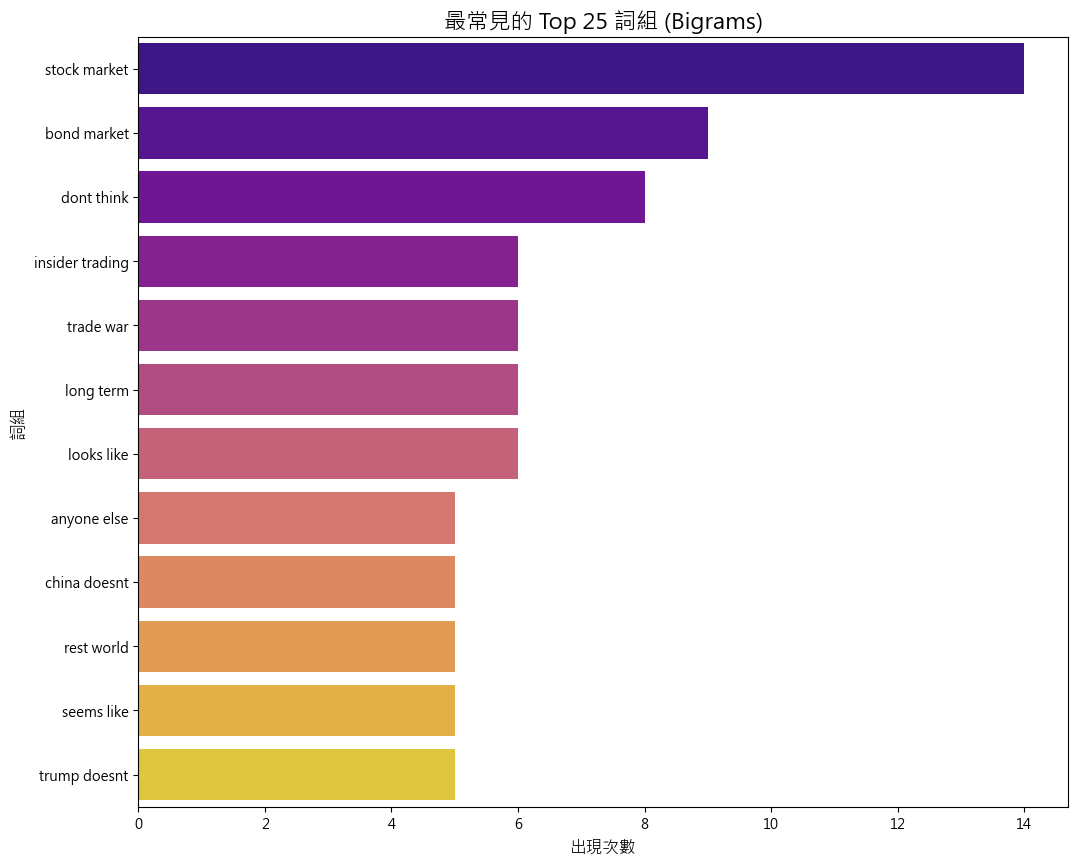

--------------------------------------------------


In [172]:
print("額外視覺化：分析最常見的連續詞組 (Bigrams)...")

# 建立一個新的 CountVectorizer，專門用來尋找 Bigrams
# ngram_range=(2, 2) 表示我們只尋找由兩個詞組成的詞組
bigram_vectorizer = CountVectorizer(
    stop_words=list(STOPWORDS),
    ngram_range=(2, 2),
    min_df=5  # 同樣設定一個最小文件頻率，過濾掉太罕見的詞組
)

# 擬合資料並轉換
X_bigrams = bigram_vectorizer.fit_transform(df['cleaned_text'])
bigram_terms = bigram_vectorizer.get_feature_names_out()

# 計算每個 Bigram 的總頻率
bigram_frequencies = np.asarray(X_bigrams.sum(axis=0)).flatten()
bigram_freq_df = pd.DataFrame({'bigram': bigram_terms, 'frequency':
bigram_frequencies})

# 排序並選出最常見的 Top 25 詞組
sorted_bigram_df = bigram_freq_df.sort_values(by='frequency',
ascending=False)
top_25_bigrams = sorted_bigram_df.head(25)

# 繪製水平長條圖 (Horizontal Bar Plot)
# 水平長條圖更適合顯示較長的詞組標籤
plt.figure(figsize=(12, 10))
sns.barplot(x='frequency', y='bigram', data=top_25_bigrams,
palette='plasma', orient='h')
plt.title('最常見的 Top 25 詞組 (Bigrams)', fontsize=16)
plt.xlabel('出現次數', fontsize=12)
plt.ylabel('詞組', fontsize=12)
plt.show()
print("-" * 50)

# Phase 2

In [ ]:
### Begin Assignment Here